In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Read File: Snakes-and-Ladders

In [29]:
N_dices = 1

file_path = f'../data/Markov-Chain - SnL ({N_dices} Dice(s)).xlsx'

df = pd.read_excel(file_path, sheet_name='matrix', header=None, index_col=None)
df = df.iloc[1:, 1:]

# Konversi ke numpy array
transition_matrix = df.to_numpy().astype(float)
transition_matrix[transition_matrix < 0] = 0

In [30]:
pd.DataFrame(transition_matrix)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.000000,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.166667,0.166667,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.166667,0.333333,0.333333,0.166667
96,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
97,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.166667,0.166667,0.166667,0.333333,0.166667
98,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [31]:
# Semua Case pada Ular Tangge
snake_ladder_df = pd.read_excel(file_path, sheet_name='snake-ladder-setup')
snake_ladder_df

,start,finish,type,Distance,Count
0,3,24,Ladder,21,1
1,8,14,Ladder,6,1
2,13,31,Ladder,18,1
3,33,54,Ladder,21,1
4,39,58,Ladder,19,1
5,41,85,Ladder,44,1
6,69,95,Ladder,26,1
7,79,98,Ladder,19,1
8,89,91,Ladder,2,1
9,25,4,Snake,-21,1


## Theoritical Fastest Route

In [32]:
def analyze_expected_steps(transition_matrix):
    n = transition_matrix.shape[0]
    
    # Ambil submatriks Q (tanpa state absorbing/finish)
    Q = transition_matrix[:n-1, :n-1]
    
    # Hitung matriks fundamental N = (I - Q)^(-1)
    I = np.identity(n-1)
    N = np.linalg.inv(I - Q)
    
    # Hitung waktu rata-rata dengan mengalikan N dengan vektor 1
    ones = np.ones(n-1)
    expected_steps = np.dot(N, ones)
    
    return expected_steps

In [33]:
# Fungsi untuk mencari rute tercepat secara probabilistik
def find_fastest_route(transition_matrix, expected_steps, start_pos=1):
    n = transition_matrix.shape[0]
    current_pos = start_pos
    route = [current_pos]
    
    # Lanjutkan sampai mencapai state absorbing
    while current_pos != n:
        # Ambil probabilitas transisi dari posisi saat ini
        transition_probs = transition_matrix[current_pos-1]
        next_positions = []
        
        # Jika ada tangga atau ular (probabilitas = 1.0)
        if 1.0 in transition_probs:
            next_pos = np.argmax(transition_probs) + 1
            current_pos = next_pos
            route.append(current_pos)
            continue
        
        # Jika normal move (roll dadu)
        # Cari posisi selanjutnya yang memiliki expected_steps terendah
        for pos, prob in enumerate(transition_probs):
            if prob > 0:
                next_positions.append((pos+1, expected_steps[pos] if pos < len(expected_steps) else 0))
        
        # Pilih posisi dengan expected steps paling rendah
        if next_positions:
            next_positions.sort(key=lambda x: x[1])
            best_next_pos = next_positions[0][0]
            current_pos = best_next_pos
            route.append(current_pos)
        else:
            break  # Tidak ada langkah yang mungkin
    
    return route

In [34]:
def visualize_results(expected_steps, fastest_route, snake_ladder_df):
    # Visualisasi expected steps
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(range(1, len(expected_steps)+1)), y=expected_steps)
    plt.title(f'Expected Steps from Each Position (From position 1: {expected_steps[0]:.2f} steps)')
    plt.xlabel('Position')
    plt.ylabel('Expected Steps')
    plt.xticks(range(0, len(expected_steps), 5), range(1, len(expected_steps)+1, 5))
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('../result/1. expected_steps.png')
    plt.show()
    
    # Tampilkan informasi rute tercepat
    print("\nRute Probabilistik Tercepat dari Kotak 1:")
    print(f"Rute: {fastest_route}")
    print(f"Jumlah langkah: {len(fastest_route)-1}")
    
    # Identifikasi ular dan tangga dalam rute
    for i in range(len(fastest_route)-1):
        current = fastest_route[i]
        next_pos = fastest_route[i+1]
        
        # Cek apakah ini tangga atau ular
        sl_info = snake_ladder_df[(snake_ladder_df['start'] == current)]
        if not sl_info.empty:
            sl_type = sl_info['type'].values[0]
            print(f"Langkah {i+1}: Dari kotak {current} → {next_pos} ({sl_type})")
        else:
            distance = next_pos - current
            print(f"Langkah {i+1}: Dari kotak {current} → {next_pos} (Maju {distance} langkah)")

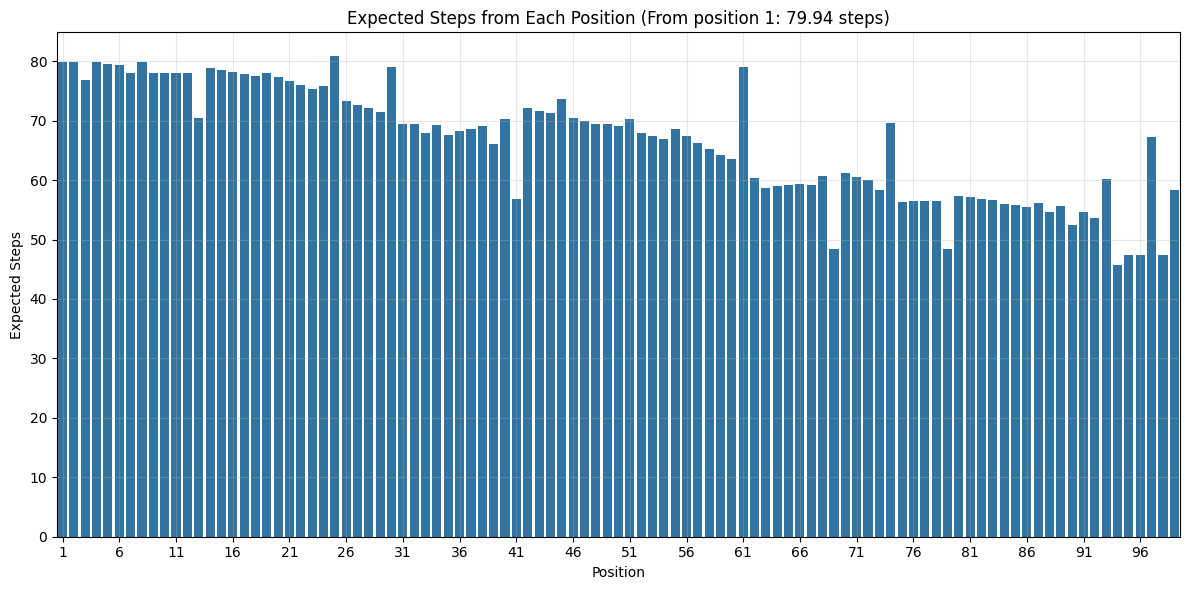


Rute Probabilistik Tercepat dari Kotak 1:
Rute: [1, 3, np.int64(24), 29, 35, 41, np.int64(85), 90, 94, 100]
Jumlah langkah: 9
Langkah 1: Dari kotak 1 → 3 (Maju 2 langkah)
Langkah 2: Dari kotak 3 → 24 (Ladder)
Langkah 3: Dari kotak 24 → 29 (Maju 5 langkah)
Langkah 4: Dari kotak 29 → 35 (Maju 6 langkah)
Langkah 5: Dari kotak 35 → 41 (Maju 6 langkah)
Langkah 6: Dari kotak 41 → 85 (Ladder)
Langkah 7: Dari kotak 85 → 90 (Maju 5 langkah)
Langkah 8: Dari kotak 90 → 94 (Maju 4 langkah)
Langkah 9: Dari kotak 94 → 100 (Maju 6 langkah)

Dari posisi awal (kotak 1), dibutuhkan rata-rata 79.94 langkah untuk menyelesaikan permainan
Posisi terbaik: Kotak 94 (membutuhkan rata-rata 45.65 langkah)
Posisi terburuk: Kotak 25 (membutuhkan rata-rata 80.83 langkah)


In [35]:
if transition_matrix is not None:
    # Analisis waktu rata-rata
    expected_steps = analyze_expected_steps(transition_matrix)
    
    # Cari rute tercepat dari kotak 1
    fastest_route = find_fastest_route(transition_matrix, expected_steps)
    
    # Visualisasi hasil
    visualize_results(expected_steps, fastest_route, snake_ladder_df)
    
    # Info tambahan
    print(f"\nDari posisi awal (kotak 1), dibutuhkan rata-rata {expected_steps[0]:.2f} langkah untuk menyelesaikan permainan")
    
    # Posisi terbaik dan terburuk
    best_pos = np.argmin(expected_steps) + 1
    worst_pos = np.argmax(expected_steps) + 1
    print(f"Posisi terbaik: Kotak {best_pos} (membutuhkan rata-rata {expected_steps[best_pos-1]:.2f} langkah)")
    print(f"Posisi terburuk: Kotak {worst_pos} (membutuhkan rata-rata {expected_steps[worst_pos-1]:.2f} langkah)")

## Create Dashboard Visualization of Snake and Ladder

In [36]:
def create_board_heatmap(expected_steps):
    # Buat papan 10x10 untuk nilai expected steps
    board_data = np.zeros((10, 10))
    
    # Salin expected_steps dan tambahkan nan untuk kotak 100
    values_to_plot = np.append(expected_steps, np.nan)  # Gunakan NaN untuk kotak 100
    
    # Petakan posisi dan expected steps ke dalam board dengan pola zigzag yang benar
    for pos in range(1, 101):  # 1-100
        # Hitung baris (dari bawah ke atas, baris 0 = bawah)
        row = (pos - 1) // 10
        
        # Untuk kolom, gunakan pola zigzag
        if row % 2 == 0:  # Baris genap (0,2,4,6,8) - dari kiri ke kanan
            col = (pos - 1) % 10
        else:  # Baris ganjil (1,3,5,7,9) - dari kanan ke kiri
            col = 9 - ((pos - 1) % 10)
        
        # Tempatkan nilai expected steps atau NaN untuk kotak 100
        board_data[9 - row, col] = values_to_plot[pos - 1]
    
    # Siapkan array untuk nomor kotak
    box_numbers = np.zeros((10, 10), dtype=int)
    for row in range(10):
        for col in range(10):
            # Hitung posisi sebenarnya (0-99)
            if (9-row) % 2 == 0:  # Baris genap dari bawah
                pos = (9-row) * 10 + col
            else:  # Baris ganjil dari bawah
                pos = (9-row) * 10 + (9 - col)
            
            # Nomor kotak adalah posisi + 1 (1-100)
            box_numbers[row, col] = pos + 1
    
    # Buat plot
    plt.figure(figsize=(16, 14))
    
    # Buat mask untuk kotak 100
    mask = np.isnan(board_data)
    
    # Buat heatmap dengan colormap yang sesuai
    min_val = np.nanmin(board_data)
    max_val = np.nanmax(board_data)
    
    ax = sns.heatmap(board_data, cmap='YlOrRd', annot=False, mask=mask,
                     linewidths=0.5, vmin=min_val, vmax=max_val,
                     cbar_kws={'label': 'Expected Steps'})
    
    # Beri warna khusus untuk kotak 100 (absorbing state)
    for i in range(10):
        for j in range(10):
            if box_numbers[i][j] == 100:
                ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color='darkgreen'))
    
    # Tambahkan nomor kotak dan nilai expected steps
    for i in range(10):
        for j in range(10):
            box_num = box_numbers[i][j]
            
            # Khusus untuk kotak 1 (Start)
            if box_num == 1:
                ax.text(j + 0.05, i + 0.15, f"{box_num}", fontsize=9, 
                       fontweight='bold', color='black')
                # Tambahkan teks "START" di dalam kotak
                ax.text(j + 0.5, i + 0.4, "START", fontsize=9,
                       ha='center', color='black', fontweight='bold')
                # Tambahkan nilai expected steps
                val = expected_steps[box_num-1]
                ax.text(j + 0.5, i + 0.7, f"{val:.1f}", fontsize=8,
                       ha='center', color='black')
            
            # Khusus untuk kotak 100 (Finish)
            elif box_num == 100:
                ax.text(j + 0.05, i + 0.2, f"{box_num}", fontsize=9, 
                       fontweight='bold', color='white')
                # Tambahkan teks "FINISH" di dalam kotak
                ax.text(j + 0.5, i + 0.5, "FINISH", fontsize=10,
                       ha='center', color='white', fontweight='bold')
            
            # Untuk kotak lainnya
            else:
                ax.text(j + 0.05, i + 0.15, f"{box_num}", fontsize=9, 
                       fontweight='bold', color='black')
                # Tambahkan nilai expected steps
                val = expected_steps[box_num-1]
                ax.text(j + 0.5, i + 0.6, f"{val:.1f}", fontsize=8,
                       ha='center', color='black')
    
    # Atur label
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.title("Heat Map Expected Steps - Snake and Ladder", fontsize=16)
    
    # Simpan dan tampilkan
    plt.tight_layout()
    plt.savefig('../result/2. board_heatmap.png', dpi=300)
    plt.show()

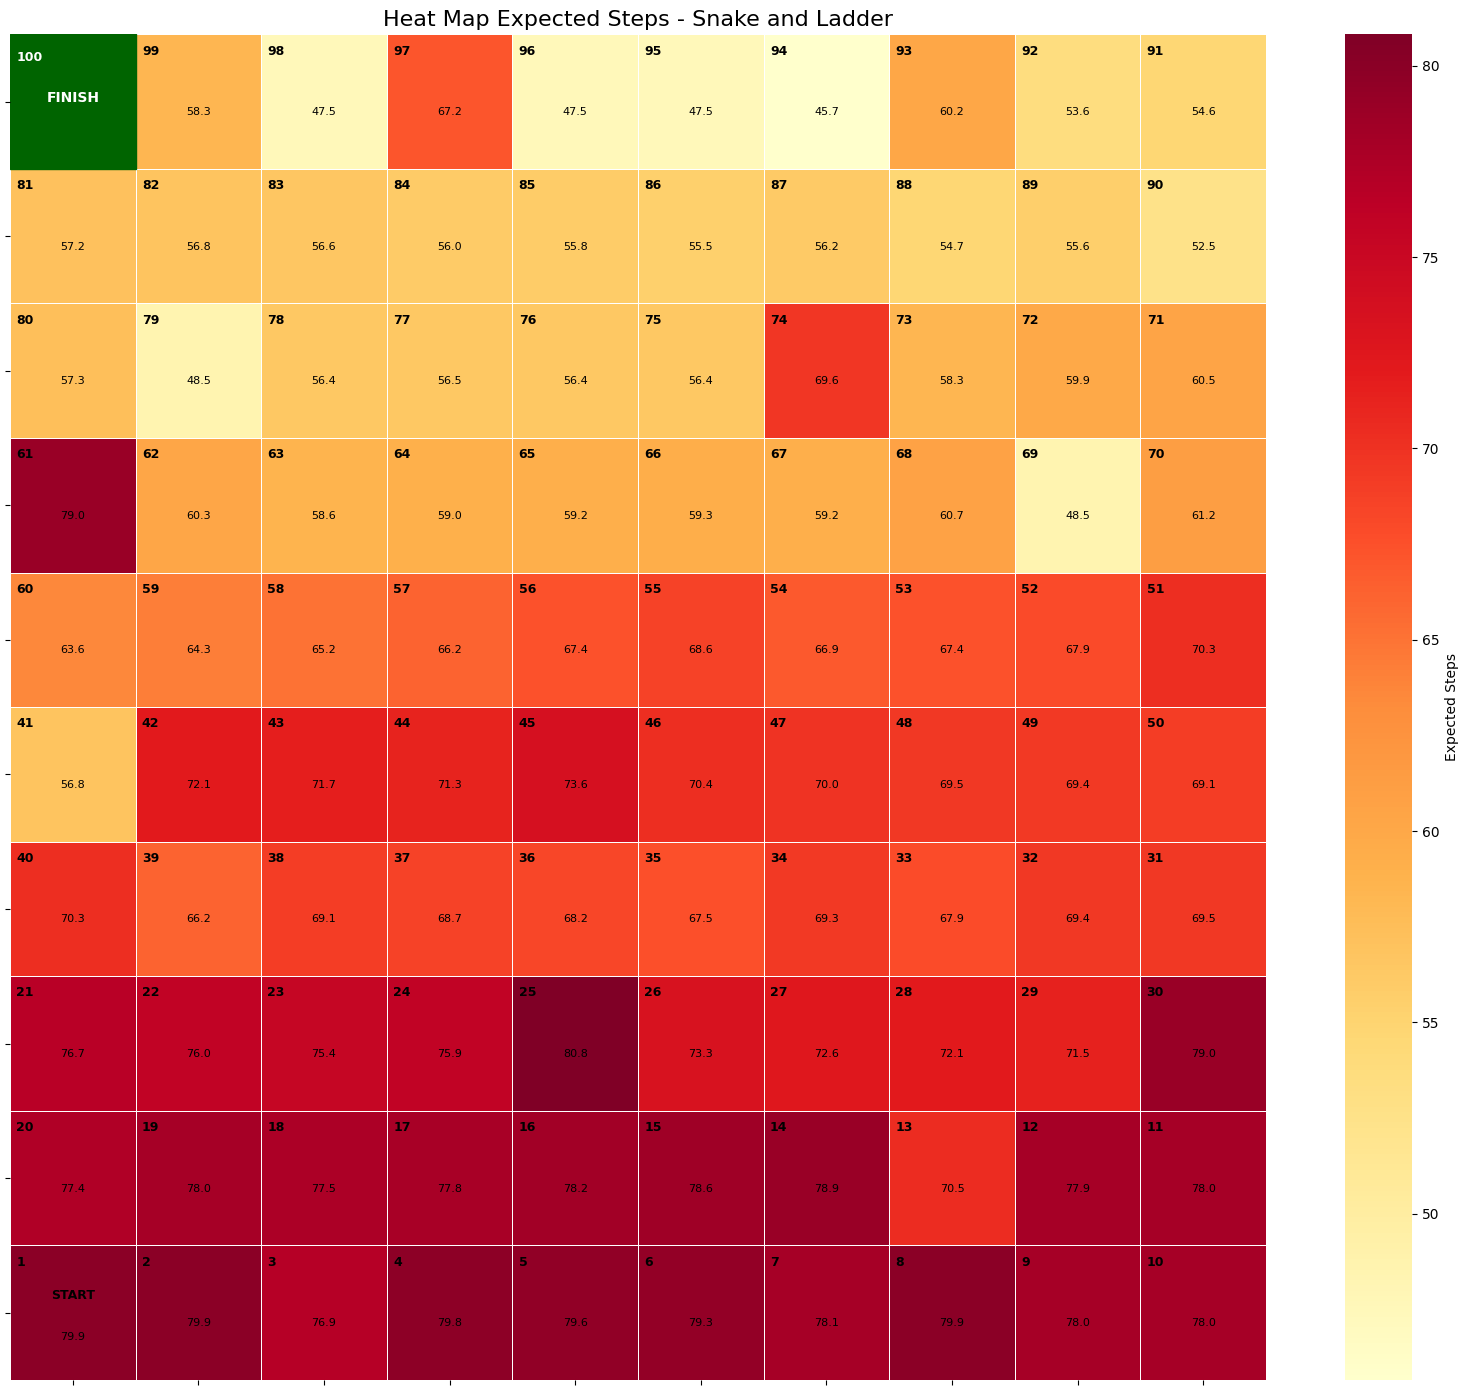

In [37]:
create_board_heatmap(expected_steps)

## Snake and Ladder Steps Impact

In [38]:
def SnL_impact(transition_matrix, snake_ladder_df):
    """
    Menganalisis dampak keberadaan ular dan tangga pada waktu penyelesaian permainan.
    - Tangga (hijau): menunjukkan pengurangan langkah (nilai positif = lebih cepat)
    - Ular (merah): menunjukkan penambahan langkah (nilai negatif = lebih lambat)
    """
    # Waktu dasar dari posisi awal
    original_expected = analyze_expected_steps(transition_matrix)[0]
    results = []
    
    # Untuk setiap ular dan tangga
    for index, row in snake_ladder_df.iterrows():
        start_pos = int(row['start'])
        end_pos = int(row['finish'])
        element_type = row['type']
        
        # Buat salinan matriks transisi
        modified_matrix = transition_matrix.copy()
        
        # Hapus efek ular/tangga
        modified_matrix[start_pos-1] = np.zeros(transition_matrix.shape[1])
        
        
        # *** MODIFIKASI BAGIAN INI: Buat gerakan normal dengan aturan pantul ***
        for i in range(1, 7):
            if start_pos + i <= 100:
                # Jika tidak melebihi 100, langsung ke posisi baru
                modified_matrix[start_pos-1, start_pos+i-1] = 1/6
            else:
                # Jika melebihi 100, pantulkan mundur
                # Contoh: dari 99 + roll 4 = 103, maka pantul ke 97
                # 100 - (103 - 100) = 100 - 3 = 97
                new_pos = 100 - ((start_pos + i) - 100)
                modified_matrix[start_pos-1, new_pos-1] = 1/6

        # Hitung expected steps dengan ular/tangga dihapus
        new_expected = analyze_expected_steps(modified_matrix)[0]
        
        # Dampak: original - new
        impact = original_expected - new_expected
        
        results.append((start_pos, end_pos, element_type, impact, end_pos - start_pos))
    
    impact_df = pd.DataFrame(results, columns=['Start', 'End', 'Type', 'Impact', 'Distance'])
    
    plt.figure(figsize=(16, 10))
    colors = {'Snake': 'red', 'Ladder': 'green'}
    impact_df = impact_df.sort_values('Start')
    
    bars = plt.bar(impact_df['Start'].astype(str), impact_df['Impact'], 
                  color=[colors[t] for t in impact_df['Type']])
    
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # Tambahkan label pada setiap bar
    for bar, start, end, impact, distance in zip(bars, impact_df['Start'], impact_df['End'], 
                                                impact_df['Impact'], impact_df['Distance']):
        label_text = f"{start}→{end}\n({impact:.1f})"
        
        # Posisi teks
        y_pos = impact/2
        if abs(impact) < 1:  # Untuk bar yang sangat pendek
            y_pos = 1 if impact > 0 else -1
            
        color = 'white' if abs(impact) > 2 else 'black'
        plt.text(bar.get_x() + bar.get_width()/2, y_pos, label_text,
                ha='center', va='center', color=color, fontweight='bold', fontsize=9)
    
    # Judul dan label - konsisten dengan interpretasi grafik
    plt.title('Impact of Snakes and Ladders on Game Completion', fontsize=16)
    plt.xlabel('Starting Position', fontsize=14)
    plt.ylabel('Change in Expected Steps (+ = fewer steps, - = more steps)', fontsize=14)
    
    # Tambahkan legend yang jelas dan konsisten
    red_patch = plt.Rectangle((0, 0), 1, 1, fc="red")
    green_patch = plt.Rectangle((0, 0), 1, 1, fc="green")
    plt.legend([green_patch, red_patch], ['Ladder (reduces steps)', 'Snake (increases steps)'],
              loc='upper right', fontsize=12)
    
    # Sesuaikan ukuran dan ticks
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    
    # Simpan dan tampilkan
    plt.tight_layout()
    plt.savefig('../result/3. snl_impact.png', dpi=300)
    plt.show()
    
    # Tampilkan informasi ringkasan yang konsisten
    print("Dampak Tangga (pengurangan langkah):")
    ladder_impact = impact_df[impact_df['Type'] == 'Ladder']['Impact'].sum()
    print(f"Total pengurangan: {ladder_impact:.2f} langkah")
    
    print("\nDampak Ular (penambahan langkah):")
    snake_impact = impact_df[impact_df['Type'] == 'Snake']['Impact'].sum()
    print(f"Total penambahan: {snake_impact:.2f} langkah")
    
    print(f"\nDampak bersih: {ladder_impact + snake_impact:.2f} langkah")
    
    # Tampilkan elemen dengan dampak terbesar (absolut)
    print("\nElemen dengan dampak terbesar:")
    impact_df['AbsImpact'] = impact_df['Impact'].abs()
    top_impacts = impact_df.sort_values('AbsImpact', ascending=False).head(3)
    for _, row in top_impacts.iterrows():
        element = "Tangga" if row['Type'] == "Ladder" else "Ular"
        effect = "mengurangi" if row['Impact'] > 0 else "menambah"
        steps = abs(row['Impact'])
        print(f"{element} {int(row['Start'])}→{int(row['End'])}: {effect} {steps:.2f} langkah")
    
    return impact_df

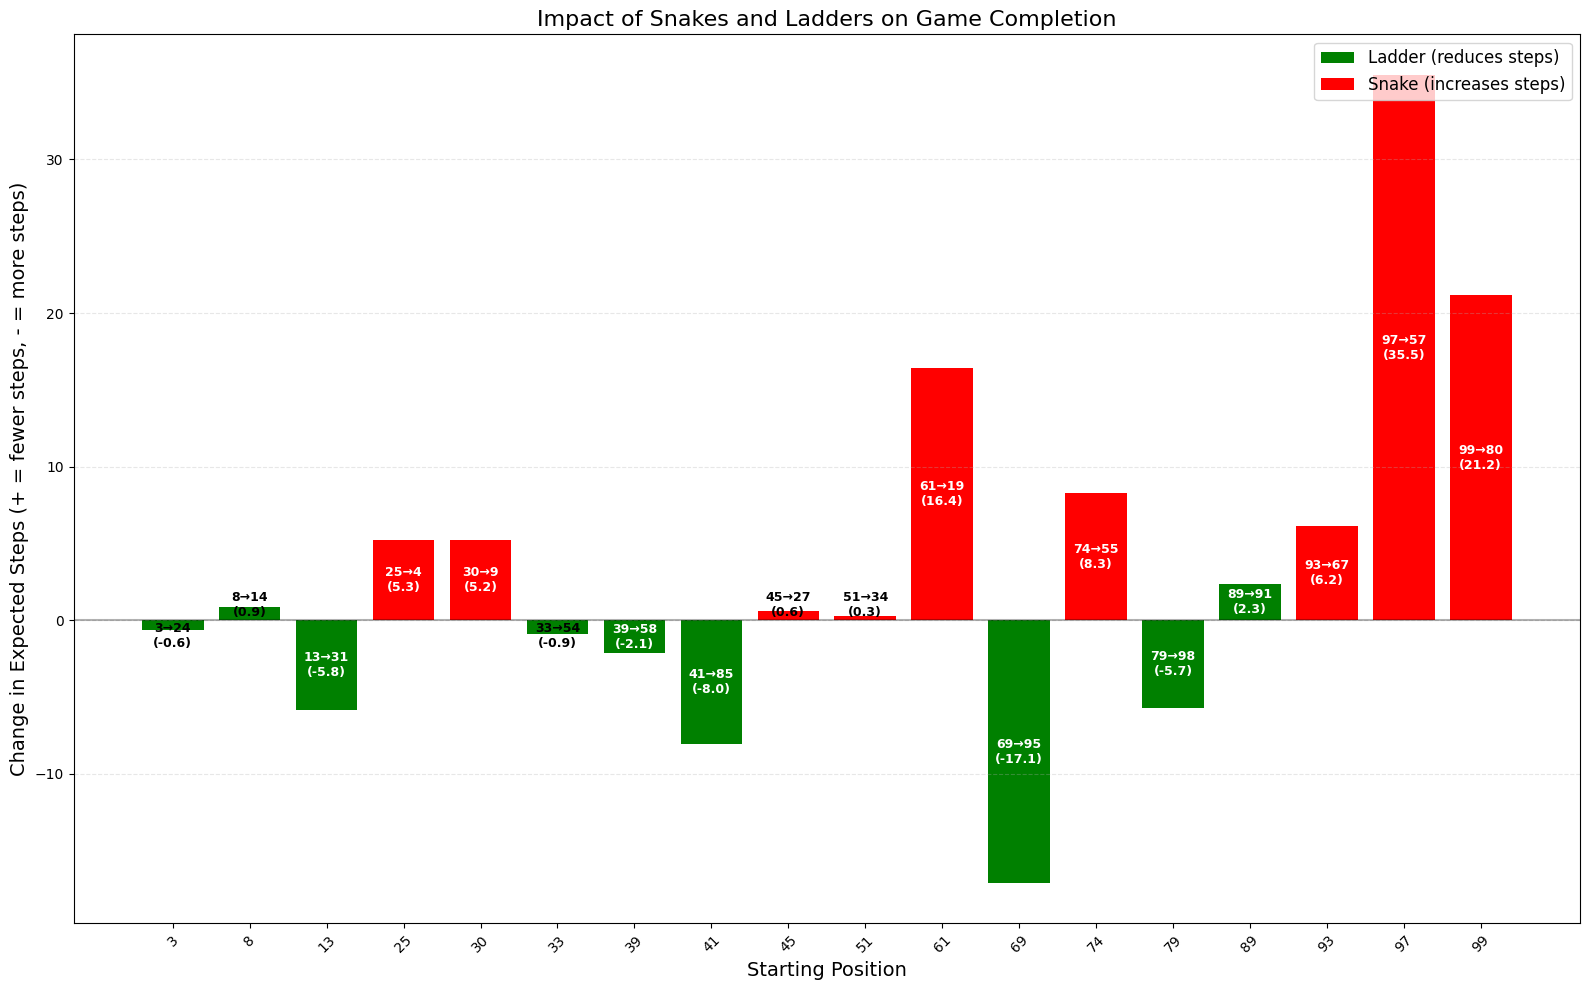

Dampak Tangga (pengurangan langkah):
Total pengurangan: -37.04 langkah

Dampak Ular (penambahan langkah):
Total penambahan: 99.00 langkah

Dampak bersih: 61.96 langkah

Elemen dengan dampak terbesar:
Ular 97→57: mengurangi 35.51 langkah
Ular 99→80: mengurangi 21.19 langkah
Tangga 69→95: menambah 17.09 langkah


,Start,End,Type,Impact,Distance,AbsImpact
0,3,24,Ladder,-0.629913,21,0.629913
1,8,14,Ladder,0.877616,6,0.877616
2,13,31,Ladder,-5.809408,18,5.809408
9,25,4,Snake,5.259111,-21,5.259111
10,30,9,Snake,5.231014,-21,5.231014
3,33,54,Ladder,-0.888730,21,0.888730
4,39,58,Ladder,-2.134988,19,2.134988
5,41,85,Ladder,-8.036853,44,8.036853
11,45,27,Snake,0.625937,-18,0.625937
12,51,34,Snake,0.300385,-17,0.300385


In [39]:
SnL_impact(transition_matrix, snake_ladder_df)

## Distribusi Probabilitas Posisi Setelah N Langkah

In [40]:
def plot_position_distribution(transition_matrix, steps=[5, 10, 20, 50]):
    n = transition_matrix.shape[0]
    initial_state = np.zeros(n)
    initial_state[0] = 1.0  # Mulai dari kotak 1
    
    # Hitung layout yang tepat berdasarkan jumlah steps
    num_steps = len(steps)
    nrows = int(np.ceil(num_steps / 3))  # Per Baris
    ncols = min(num_steps, 3)  # Maksimum 2 kolom
    
    plt.figure(figsize=(16, 4 * nrows))
    
    for i, num_steps in enumerate(steps):
        # Hitung distribusi setelah n langkah
        current_state = initial_state.copy()
        for _ in range(num_steps):
            current_state = np.dot(current_state, transition_matrix)
        
        # Plot
        plt.subplot(nrows, ncols, i+1)
        
        # Tambahkan highlighting untuk finish probability
        finish_prob = current_state[-1]
        
        plt.bar(range(1, n+1), current_state, color='skyblue')
        
        # Highlight finish position
        plt.bar(n, current_state[-1], color='green')
        
        plt.title(f'Position Distribution After {num_steps} Steps\nP(finish) = {finish_prob:.4f}')
        plt.xlabel('Position')
        plt.ylabel('Probability')
        
        # Tambahkan anotasi untuk probabilitas tinggi
        high_prob_threshold = max(0.05, np.max(current_state) * 0.7)
        for pos, prob in enumerate(current_state):
            if prob > high_prob_threshold:
                plt.annotate(f"{prob:.3f}", xy=(pos+1, prob), ha='center', va='bottom', fontsize=8)
        
        plt.grid(alpha=0.3)
        plt.xticks(np.arange(0, n+1, 10))  # Tampilkan ticks setiap 10 kotak
    
    plt.tight_layout()
    plt.savefig('../result/4. position_distribution.png', dpi=300)
    plt.show()

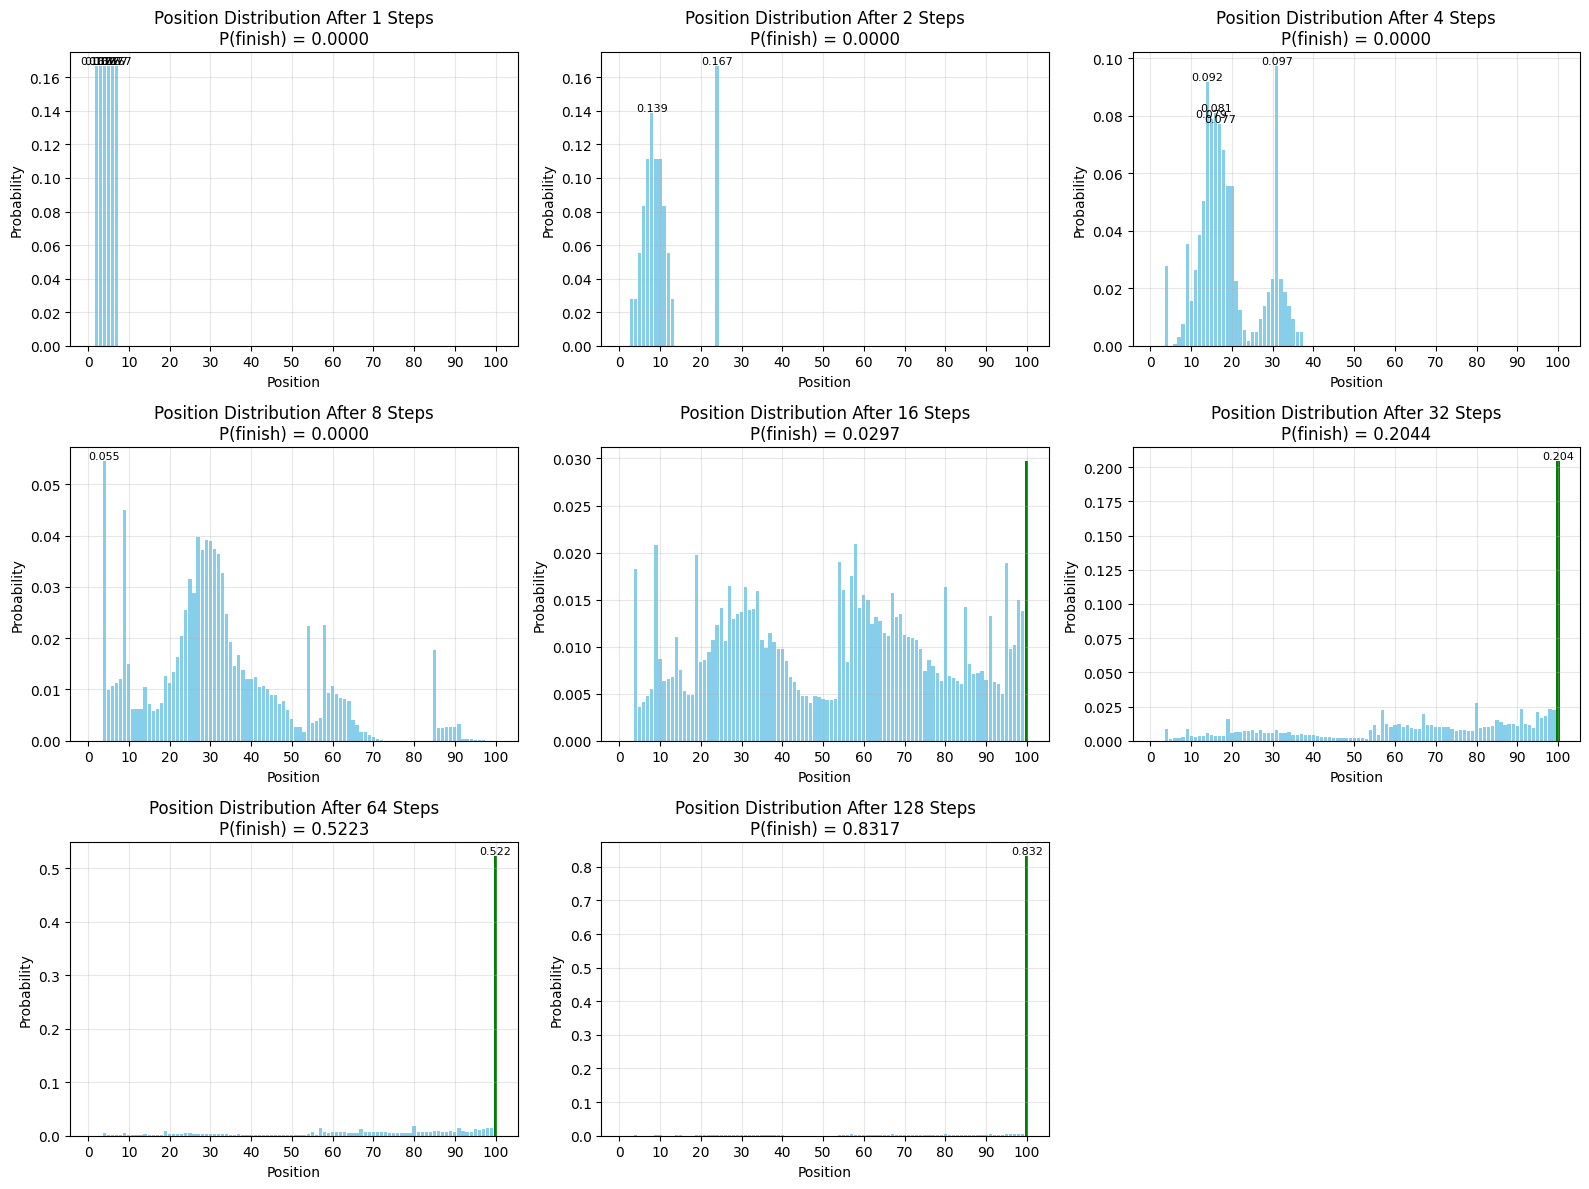

In [41]:
plot_position_distribution(transition_matrix, steps=[1,2,4,8,16,32,64,128])

## Finish the game in N steps

In [42]:
def plot_finish_probability(transition_matrix, max_steps=200):
    """
    Menampilkan distribusi probabilitas penyelesaian permainan pada setiap langkah
    (bukan kumulatif)
    """
    n = transition_matrix.shape[0]
    initial_state = np.zeros(n)
    initial_state[0] = 1.0  # Mulai dari kotak 1
    
    # Hitung probabilitas kumulatif
    cumulative_probs = []
    current_state = initial_state.copy()
    
    for _ in range(max_steps):
        current_state = np.dot(current_state, transition_matrix)
        cumulative_probs.append(current_state[-1])
    
    # Hitung distribusi probabilitas (non-kumulatif)
    # P(finish tepat pada langkah i) = P(finish sampai langkah i) - P(finish sampai langkah i-1)
    dist_probs = [cumulative_probs[0]]  # Langkah pertama sama dengan kumulatifnya
    for i in range(1, len(cumulative_probs)):
        dist_probs.append(cumulative_probs[i] - cumulative_probs[i-1])
    
    # Buat plot
    plt.figure(figsize=(16, 10))
    
    # Plot distribusi probabilitas
    plt.subplot(2, 1, 1)
    plt.bar(range(1, max_steps+1), dist_probs, color='skyblue', alpha=0.7)
    plt.title('Probability Distribution of Finishing the Game at Specific Steps', fontsize=14)
    plt.xlabel('Number of Steps')
    plt.ylabel('Probability')
    plt.grid(alpha=0.3)
    
    # Temukan langkah dengan probabilitas tertinggi
    max_prob_step = np.argmax(dist_probs) + 1
    max_prob = dist_probs[max_prob_step - 1]
    
    # Tandai langkah dengan probabilitas tertinggi
    plt.annotate(f'Most likely: Step {max_prob_step}\nP = {max_prob:.4f}',
                xy=(max_prob_step, max_prob),
                fontsize=10, bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
    
    # Plot kumulatif untuk perbandingan
    plt.subplot(2, 1, 2)
    plt.plot(range(1, max_steps+1), cumulative_probs, 'r-', linewidth=2)
    plt.axhline(y=0.5, color='g', linestyle='--', alpha=0.7, label='50% probability')
    plt.axhline(y=0.9, color='b', linestyle='--', alpha=0.7, label='90% probability')
    
    # Temukan langkah untuk 50% dan 90% probabilitas kumulatif
    step_50 = next((i for i, p in enumerate(cumulative_probs) if p >= 0.5), None)
    step_90 = next((i for i, p in enumerate(cumulative_probs) if p >= 0.9), None)
    
    if step_50 is not None:
        step_50 += 1  # Adjust for 0-indexing
        plt.annotate(f'50%: Step {step_50}',
                    xy=(step_50, 0.5), xytext=(step_50+5, 0.55),
                    arrowprops=dict(facecolor='green', shrink=0.05, width=1),
                    fontsize=10)
    
    if step_90 is not None:
        step_90 += 1  # Adjust for 0-indexing
        plt.annotate(f'90%: Step {step_90}',
                    xy=(step_90, 0.9), xytext=(step_90+5, 0.85),
                    arrowprops=dict(facecolor='blue', shrink=0.05, width=1),
                    fontsize=10)
    
    plt.title('Cumulative Probability of Finishing the Game within a Number of Steps', fontsize=14)
    plt.xlabel('Number of Steps')
    plt.ylabel('Cumulative Probability')
    plt.grid(alpha=0.3)
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('../result/5. finish_probability_density.png', dpi=300)
    plt.show()
    
    # Hitung dan tampilkan statistik
    print("\nStatistik Penyelesaian Permainan:")
    print("-" * 40)
    
    # Mode (langkah dengan probabilitas tertinggi)
    print(f"Langkah dengan probabilitas tertinggi: {max_prob_step} (P = {max_prob:.4f})")
    
    # Median (50% persentil)
    if step_50 is not None:
        print(f"Median (50% pemain selesai): {step_50} langkah")
    else:
        print(f"Median tidak tercapai dalam {max_steps} langkah")
    
    # Mean (expected value)
    # E[X] = ∑(x * P(X=x))
    expected_steps = sum((i+1) * prob for i, prob in enumerate(dist_probs))
    print(f"Mean (expected steps): {expected_steps:.2f} langkah")
    
    # Variance
    # Var[X] = E[X²] - (E[X])²
    expected_steps_squared = sum(((i+1)**2) * prob for i, prob in enumerate(dist_probs))
    variance = expected_steps_squared - (expected_steps**2)
    print(f"Standard deviation: {np.sqrt(variance):.2f} langkah")
    
    # Berbagai persentil
    percentiles = [10, 25, 50, 75, 90, 95, 99]
    print("\nPersentil penyelesaian permainan:")
    
    for p in percentiles:
        threshold = p/100
        step = next((i for i, c in enumerate(cumulative_probs) if c >= threshold), None)
        if step is not None:
            step += 1  # Adjust for 0-indexing
            print(f"{p}%: {step} langkah")
        else:
            print(f"{p}%: >{max_steps} langkah")
    
    # return dist_probs, cumulative_probs